In [3]:
import numpy as np
import os 
from IPython.display import Image, display, Math, Latex


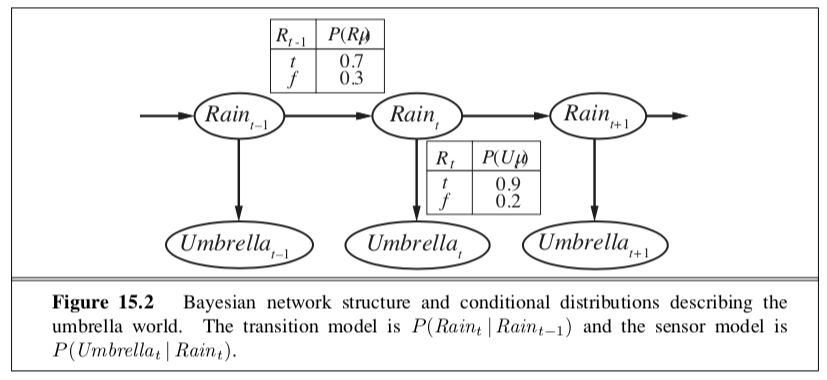

In [4]:
Image(filename='model.png')

Transition Model: $P(Rain_t \mid Rain_{t-1})$ 

Observation Model: $P(Umbrella_t \mid Rain_{t})$

In [5]:
transitionModel = np.matrix([[0.7, 0.3],
                            [0.3, 0.7]])
observationModel_true = np.matrix([[0.9, 0.0],
                                   [0.0, 0.2]])
observationModel_false = np.abs(observationModel_true-np.eye(2))
observationModel_false

matrix([[0.1, 0. ],
        [0. , 0.8]])


### 2. Implement in the chosen programming language direct sampling,
as studied in class, and use it to sample at least 15 sequences of length 20. Note: store both the sequence of states and observations.

In [6]:
def DirectPriorSampling(n_samples = 20):
    '''
    args:
    bn = A Bayesian Network specifying joint distribution P(X_1,...,X_n)
    returns:
    an event sampled from the prior specified by bn
    '''
    x = np.zeros(n_samples)
    for i in range(len(x)):
        x[i] = np.random.sample() #P(X_i|parents(X_i)
    return x
    
    

In [7]:
DirectPriorSampling()

array([0.48209295, 0.07314953, 0.78653069, 0.09309278, 0.39128181,
       0.93202226, 0.87925824, 0.716761  , 0.00658967, 0.739351  ,
       0.45019477, 0.82730429, 0.99352247, 0.87667803, 0.18006187,
       0.53221621, 0.26800505, 0.10163275, 0.36336316, 0.30669313])

In [8]:
init = np.array([0.5,0.5])
T = np.array([0.7,0.3])
O = np.array([0.9,0.2])

In [9]:
T*init+T*init

array([0.7, 0.3])

In [10]:
N=15
for i in range(N):
    print(transitionModel)
    transitionModel*=transitionModel/N


[[0.7 0.3]
 [0.3 0.7]]
[[0.03866667 0.028     ]
 [0.028      0.03866667]]
[[0.00015194 0.00014436]
 [0.00014436 0.00015194]]
[[2.92830101e-09 2.92446534e-09]
 [2.92446534e-09 2.92830101e-09]]
[[1.14182962e-18 1.14182864e-18]
 [1.14182864e-18 1.14182962e-18]]
[[1.73836502e-37 1.73836502e-37]
 [1.73836502e-37 1.73836502e-37]]
[[4.02921724e-75 4.02921724e-75]
 [4.02921724e-75 4.02921724e-75]]
[[2.16461221e-150 2.16461221e-150]
 [2.16461221e-150 2.16461221e-150]]
[[6.2473947e-301 6.2473947e-301]
 [6.2473947e-301 6.2473947e-301]]
[[0. 0.]
 [0. 0.]]
[[0. 0.]
 [0. 0.]]
[[0. 0.]
 [0. 0.]]
[[0. 0.]
 [0. 0.]]
[[0. 0.]
 [0. 0.]]
[[0. 0.]
 [0. 0.]]


In [67]:
def sample(self, numsteps):
        states = zeros((self.numstates, numsteps))
        observations = zeros(numsteps)
        initProbs = exp(self.logInitProbs)
        initProbs -= (initProbs.sum()-1.0)
        emissionProbs = exp(self.logEmissionProbs)
        emissionProbs -= (emissionProbs.sum(1)[:,None]-1.0)
        transitionProbs = exp(self.logTransitionProbs)
        transitionProbs -= (transitionProbs.sum(1)[:,None]-1.0)
        if initProbs.sum() >= 1:
            initProbs-=0.000000001
            initProbs[initProbs<0.0] = 0.0
        for k in range(self.numstates):
            if emissionProbs[k,:].sum() >= 1:
                emissionProbs[k,:]-=0.000000001
                emissionProbs[k,:][emissionProbs[k,:]<0.0] = 0.0
            if transitionProbs[k,:].sum() >= 1:
                transitionProbs[k,:]-=0.000000001
                transitionProbs[k,:][transitionProbs[k,:]<0.0] = 0.0
        states[:, 0] = numpy.random.multinomial(1, initProbs, 1)[0]
        state = where(states[:,0]==1)[0][0]
        observations[0] = where(
               numpy.random.multinomial(1, emissionProbs[state,:], 1)[0]==1)[0]
        for i in range(1, numsteps):
            state = where(states[:,i-1]==1)[0][0]
            states[:, i] = \
                   numpy.random.multinomial(1, transitionProbs[state,:], 1)[0]
            observations[i] = where(
               numpy.random.multinomial(1, emissionProbs[state,:], 1)[0]==1)[0]
        return observations

In [147]:
np.random.multinomial(15, T, size = 20)


array([[ 9,  6],
       [ 7,  8],
       [13,  2],
       [12,  3],
       [12,  3],
       [ 9,  6],
       [11,  4],
       [13,  2],
       [10,  5],
       [10,  5],
       [11,  4],
       [12,  3],
       [11,  4],
       [12,  3],
       [10,  5],
       [11,  4],
       [13,  2],
       [ 8,  7],
       [ 7,  8],
       [12,  3]])

In [148]:
np.random.multinomial(15, O, size = 20)

array([[13,  2],
       [15,  0],
       [14,  1],
       [14,  1],
       [13,  2],
       [14,  1],
       [12,  3],
       [15,  0],
       [12,  3],
       [13,  2],
       [15,  0],
       [14,  1],
       [13,  2],
       [13,  2],
       [14,  1],
       [15,  0],
       [12,  3],
       [12,  3],
       [15,  0],
       [14,  1]])

In [154]:
mu, sigma = 0.5, 0.1 # mean and standard deviation
np.random.normal(mu, sigma, 10)

array([0.48737673, 0.60092781, 0.61680038, 0.59637643, 0.32936973,
       0.28548854, 0.57365192, 0.53019631, 0.56387279, 0.34130501])

In [15]:
#Copyright (c) 2010, Roland Memisevic
#All rights reserved.
#
#Redistribution and use in source and binary forms, with or without modification, are permitted provided that the following conditions are met:
#
#    * Redistributions of source code must retain the above copyright notice, this list of conditions and the following disclaimer.
#    * Redistributions in binary form must reproduce the above copyright notice, this list of conditions and the following disclaimer in the documentation and/or other materials provided with the distribution.
#
#            THIS SOFTWARE IS PROVIDED BY THE COPYRIGHT HOLDERS AND CONTRIBUTORS "AS IS" AND ANY EXPRESS OR IMPLIED WARRANTIES, INCLUDING, BUT NOT LIMITED TO, THE IMPLIED WARRANTIES OF MERCHANTABILITY AND FITNESS FOR A PARTICULAR PURPOSE ARE DISCLAIMED. IN NO EVENT SHALL THE COPYRIGHT HOLDER OR CONTRIBUTORS BE LIABLE FOR ANY DIRECT, INDIRECT, INCIDENTAL, SPECIAL, EXEMPLARY, OR CONSEQUENTIAL DAMAGES (INCLUDING, BUT NOT LIMITED TO, PROCUREMENT OF SUBSTITUTE GOODS OR SERVICES; LOSS OF USE, DATA, OR PROFITS; OR BUSINESS INTERRUPTION) HOWEVER CAUSED AND ON ANY THEORY OF LIABILITY, WHETHER IN CONTRACT, STRICT LIABILITY, OR TORT (INCLUDING NEGLIGENCE OR OTHERWISE) ARISING IN ANY WAY OUT OF THE USE OF THIS SOFTWARE, EVEN IF ADVISED OF THE POSSIBILITY OF SUCH DAMAGE.


""" 
Hidden Markov Models in Python.

This module can be used to instantiate, train and apply Hidden Markov Models. 
Both discrete and real-valued observations are supported. 

Training for both types of data can be performend using either a *single* sequence 
(encoded as numpy array) or *multiple* sequences (encoded as a list of numpy arrays). 

To instantiate a model, use either of the classes GaussianHmm or DiscreteHmm. 
GaussianHmm implements an HMM with full covariance Gaussian observables. 
DiscreteHmm implements an HMM with discrete (aka. multinomial) observables. 

Use the method learn to train the model. Use the method decode to compute 
state-probabilities given (test-)data as well as the log-probability of the test-data.

A very simple usage example is provided at the bottom of the file. 


This module uses numpy, and matplotlib for visualization.

See the copyright notice at the top of this file. 
"""


from numpy import sum, zeros, ones, newaxis, pi, exp, log, dot, eye, diag, arccos, sqrt, array, vstack, prod, isfinite, inf, real, arange, sin, cos, hstack, where, mean, double, concatenate
from numpy.linalg.linalg import svd, eigh
import numpy.random
from pylab import randn, scatter, hold, gca, axes, cla, norm, plot, imshow, cm
from matplotlib.patches import Ellipse

SMALL = 10.0**-10.0
logSMALL = log(SMALL)
log2pi = log(2) + log(pi)


def absdet(M):
    U,D,Vt = svd(M)
    wellConditioned = D>0.000000001
    return prod(D[wellConditioned])


def pinv(M):
    U,D,Vt = svd(M)
    wellConditioned = D>0.000000001
    return dot(U[:,wellConditioned], 
               dot(diag(D[wellConditioned]**-1.0), Vt[wellConditioned,:]))


def plotGaussian(m, covar):
    """ plot a 2d gaussian """ 

    t = arange(-pi,pi,0.01)
    k = len(t)
    x = sin(t)[:, newaxis]
    y = cos(t)[:, newaxis]
    
    D, V = eigh(covar)
    A = real(dot(V,diag(sqrt(D))).T)
    z = dot(hstack([x, y]), A)
    
    hold('on')
    plot(z[:,0]+m[0], z[:,1]+m[1])
    plot(array([m[0]]), array([m[1]]))

    
def logsumexp(x, dim=-1):
    """Compute log(sum(exp(x))) in a numerically stable way.
    
       Use second argument to specify along which dimensions the logsumexp
       shall be computed. If -1 (which is the default), logsumexp is 
       computed along the last dimension. 
    """
    if len(x.shape) < 2:
        xmax = x.max()
        return xmax + log(sum(exp(x-xmax)))
    else:
        if dim != -1:
            x = x.transpose(range(dim) + range(dim+1, len(x.shape)) + [dim])
        lastdim = len(x.shape)-1
        xmax = x.max(lastdim)
        return xmax + log(sum(exp(x-xmax[...,newaxis]),lastdim))


class GaussianHmm(object):
    """ Hidden Markov model with Gaussian observables. """

    def __init__(self, numstates, numdims):
        self.numstates = numstates
        self.numdims = numdims
        self.numparams = self.numdims * self.numstates\
                         + self.numdims**2 * self.numstates\
                         + self.numstates\
                         + self.numstates**2
        self.params = zeros(self.numparams, dtype=float)
        self.means = self.params[:self.numdims * self.numstates].reshape(
                                                  self.numdims, self.numstates)
        self.covs = self.params[self.numdims * self.numstates:
                                self.numdims * self.numstates+
                                self.numdims**2 * self.numstates].reshape(
                                    self.numdims, self.numdims, self.numstates)
        self.logInitProbs = self.params[self.numdims * self.numstates+
                                        self.numdims**2 * self.numstates:
                                        self.numdims * self.numstates+
                                        self.numdims**2 * self.numstates+
                                        self.numstates]
        self.logTransitionProbs = self.params[-self.numstates**2:].reshape(
                                                self.numstates, self.numstates)
        self.means[:] = 0.1*randn(self.numdims, self.numstates)
        for k in range(self.numstates):
            self.covs[:, :, k] = eye(self.numdims) * 0.1
        self.logInitProbs[:] = log(
                            ones(self.numstates, dtype=float) / self.numstates)
        self.logTransitionProbs[:] = log(ones((self.numstates, self.numstates), 
                                                   dtype=float)/self.numstates)

    def _loggaussian(self, datapoint, k):
        lognormalizer = - 0.5*self.numdims*log2pi \
                        - 0.5*log(absdet(self.covs[:, :, k]))
        datapoint_m = (datapoint - self.means[:, k])[:,newaxis]
        Kinv = pinv(self.covs[:, :, k])
        return lognormalizer - 0.5*(dot(datapoint_m.T, dot(Kinv, datapoint_m)))

    def _gaussian(self, datapoint, k):
        return exp(self._loggaussian(datapoint, k))

    def alphabeta(self, data):
        """ Produces log-alpha and log-beta tables with the alpha-beta
        algorithm. """
        numdims, numpoints = data.shape
        logAlpha = zeros((self.numstates, numpoints), dtype=float)
        logBeta = zeros((self.numstates, numpoints), dtype=float)
        for k in range(self.numstates):
            logAlpha[k, 0] = self.logInitProbs[k] +\
                                                self._loggaussian(data[:,0], k)
            logBeta[k, -1] = 0.0
        for t in range(numpoints-1):
            for k in range(self.numstates):
                logAlpha[k, t+1] = logsumexp(self.logTransitionProbs[:, k]+
                                                               logAlpha[:, t])\
                                           + self._loggaussian(data[:, t+1], k)
                assert isfinite(sum(exp(logAlpha)))
        for t in range(numpoints-2, 0, -1):
            for k in range(self.numstates):
                logBeta[k, t] = logsumexp(logBeta[:,t+1]+
                                                 self.logTransitionProbs[k, :]+
                                 array([ self._loggaussian(data[:, t+1], i)
                                    for i in range(self.numstates)]).flatten())
        return logAlpha, logBeta


    def learn(self, data, numsteps, visualize=False):
        if type(data) is not type([]): #learn on a single sequence
            numdims, numpoints = data.shape
            assert numdims == self.numdims
            logXi = zeros((numpoints-1,self.numstates,self.numstates),
                                                                   dtype=float)
            
            lastlogprob = -inf
            for iteration in range(numsteps):
                print ("EM iteration: %d" % iteration)

                #E-step:
                logAlpha, logBeta = self.alphabeta(data)
                #compute xi and gamma:
                for t in range(numpoints-1):
                    for i in range(self.numstates):
                        for j in range(self.numstates):
                            logXi[t, i, j] = logAlpha[i, t]+\
                                           self.logTransitionProbs[i, j]+\
                                           self._loggaussian(data[:, t+1], j)+\
                                           logBeta[j, t+1]
                    logXi[t, :, :] -= logsumexp(logXi[t, :, :].flatten())

                logGamma = vstack( (logsumexp(logXi, 2), 
                                    logsumexp(logXi[-1,:,:], 1)) )

                logprob = logsumexp(logAlpha[:, -1])
                
                print ("logprob = %f" % logprob)

                if abs(logprob-lastlogprob)<=10**-6:
                    print ("converged" )
                    break

                lastlogprob = logprob

                #M-step:
                self.logInitProbs[:] = logGamma[0, :]
                self.logTransitionProbs[:] = logsumexp(logXi, 0) - \
                                      logsumexp(logGamma[:-1,:], 0)[:, newaxis]
                G = exp(logGamma - logsumexp(logGamma, 0)[newaxis,:])
                for k in range(self.numstates):
                    self.means[:, k] = sum(G[:, k][newaxis,:]*data, 1)
                    data_m = data-self.means[:, k][:,newaxis]
                    self.covs[:, :, k] = dot((data_m*G[:, k][newaxis,:]),
                                              data_m.T) 

                #threshold eigenvalues:
                for k in range(self.numstates):
                    U, D, Vt = svd(self.covs[:, :, k])
                    D[D<0.01] = 0.01
                    self.covs[:, :, k] = dot(U, dot(diag(D), Vt))
        
                #visualize: 
                if visualize and self.numdims == 2:
                    data = concatenate(data)
                    cla()
                    scatter(*data)
                    for k in range(self.numstates):
                        plotGaussian(self.means[:,k], self.covs[:, :, k])

        else: #got a list -- learn on multiple sequences
            numseqs = len(data)
            lastaverageLogprob = -inf
            logAlphas = [None] * numseqs
            logBetas = [None] * numseqs
            logXis = [None] * numseqs
            logGammas = [None] * numseqs
            logprobs = [None] * numseqs
            dataarray = concatenate(data)
            for iteration in range(numsteps):
                print ("EM iteration: %d" % iteration)
                #E-step:
                for seqindex, d in enumerate(data):
                    numdims, numpoints = d.shape
                    logAlphas[seqindex], logBetas[seqindex] = self.alphabeta(d)
                    #compute xi and gamma:
                    assert numdims == self.numdims
                    logXis[seqindex] = zeros(
                      (numpoints-1,self.numstates,self.numstates), dtype=float)
                    for t in range(numpoints-1):
                        for i in range(self.numstates):
                            for j in range(self.numstates):
                                logXis[seqindex][t, i, j] = \
                                              logAlphas[seqindex][i, t]+\
                                              self.logTransitionProbs[i, j]+\
                                              self._loggaussian(d[:, t+1], j)+\
                                              logBetas[seqindex][j, t+1]
                        logXis[seqindex][t, :, :] -= logsumexp(
                                           logXis[seqindex][t, :, :].flatten())

                    logGammas[seqindex] = vstack(
                                            (logsumexp(logXis[seqindex], 2), 
                                      logsumexp(logXis[seqindex][-1,:,:], 1)) )
                    logprobs[seqindex] = logsumexp(logAlphas[seqindex][:, -1])

                averageLogprob = mean(logprobs)
                print ("logprob = %f" % averageLogprob)
                if abs(averageLogprob-lastaverageLogprob)<=10**-6:
                    print ("converged")
                    break
                lastaverageLogprob = averageLogprob

                #M-step:
                logInitProbs = []
                logTransitionProbs = []
                oldmeans = self.means.copy()
                self.logInitProbs = \
                            logsumexp(array([l[0,:] for l in logGammas]),0)\
                                                          -log(double(numseqs))
                logXisArray = concatenate(logXis, 0)
                logGammasArray_ = \
                              concatenate(map(lambda x: x[:-1,:],logGammas), 0)
                self.logTransitionProbs = logsumexp(logXisArray, 0) \
                                    - logsumexp(logGammasArray_, 0)[:, newaxis]
                dataarray = concatenate(data, 1)
                logGammasArray = concatenate(logGammas, 0)
                G = exp(logGammasArray-logsumexp(logGammasArray,0)[newaxis,:])
                for k in range(self.numstates):
                    self.means[:, k] = sum( exp(logGammasArray[:,k]-
                                  logsumexp(logGammasArray[:,k],0))[:,newaxis]
                                                    * dataarray.T, 0)
                    data_m = dataarray-oldmeans[:, k][:,newaxis]
                    self.covs[:, :, k] = dot((data_m*G[:,k][newaxis,:]),
                                              data_m.T) 

                #threshold eigenvalues:
                for k in range(self.numstates):
                    U, D, Vt = svd(self.covs[:, :, k])
                    D[D<0.01] = 0.01
                    self.covs[:, :, k] = dot(U, dot(diag(D), Vt))
    
                #visualize: 
                if visualize and self.numdims == 2:
                    cla()
                    scatter(*dataarray)
                    for k in range(self.numstates):
                        plotGaussian(self.means[:,k], self.covs[:, :, k])

    def logdecode(self, data):
        """ Returns a tuple, whose first component is the table 
        log p(states|data) and whose second component is the 
        log-probability of the data."""
        numdims, numpoints = data.shape
        assert numdims == self.numdims
        logXi = zeros((numpoints-1,self.numstates,self.numstates),dtype=float)
        logAlpha, logBeta = self.alphabeta(data)
        #compute xi and gamma:
        for t in range(numpoints-1):
            for i in range(self.numstates):
                for j in range(self.numstates):
                    logXi[t, i, j] = logAlpha[i, t]+\
                                      self.logTransitionProbs[i, j]+\
                                      self._loggaussian(data[:, t+1], j)+\
                                      logBeta[j, t+1]
            logXi[t, :, :] = logXi[t, :, :]-\
                              logsumexp(logXi[t, :, :].flatten())

        return vstack((logsumexp(logXi, 2), 
                       logAlpha[:, -1]-logsumexp(logAlpha[:, -1]))),\
               logsumexp(logAlpha[:,-1])

    def decode(self, data):
        """ Returns a tuple, whose first component is the table 
        p(states|data) and whose second component is the 
        log-probability of the data."""
        logdecoding = self.logdecode(data)
        return exp(logdecoding[0]), logdecoding[1]


class DiscreteHmm(object):
    """ Hidden Markov model with discrete ('multinoulli') observables. """

    def __init__(self, numstates, numclasses):
        self.numstates = numstates
        self.numclasses = numclasses
        self.numparams = self.numclasses * self.numstates\
                         + self.numstates\
                         + self.numstates**2
        self.params = zeros(self.numparams, dtype=float)
        self.logEmissionProbs = \
                        self.params[:self.numclasses * self.numstates].reshape(
                                               self.numstates, self.numclasses)
        self.logInitProbs = self.params[self.numclasses * self.numstates:
                                        self.numclasses * self.numstates+
                                        self.numstates]
        self.logTransitionProbs = self.params[-self.numstates**2:].reshape(
                                                self.numstates, self.numstates)
        self.logEmissionProbs[:] = \
                    ones((self.numstates, self.numclasses),dtype=numpy.double)\
                                    /numpy.double(self.numclasses) +\
                            randn(self.numstates, self.numclasses)*0.001
        self.logEmissionProbs /= self.logEmissionProbs.sum(1)[:,newaxis]
        self.logEmissionProbs = log(self.logEmissionProbs)
        self.logInitProbs[:] = ones(self.numstates, dtype=float) \
                                                        / self.numstates+\
                            randn(self.numstates)*0.001
        self.logInitProbs /= self.logInitProbs.sum()
        self.logInitProbs[:] = log(self.logInitProbs)
        self.logTransitionProbs[:] = ones((self.numstates, self.numstates), 
                                                 dtype=float)/self.numstates+\
                                     randn(self.numstates,self.numstates)*0.001
        self.logTransitionProbs /= self.logTransitionProbs.sum(1)[:,newaxis]
        self.logTransitionProbs[:] = log(self.logTransitionProbs)


    def alphabeta(self, data):
        """ Produces log-alpha and log-beta tables with the alpha-beta
        algorithm. """
        numclasses, numpoints = data.shape
        logAlpha = zeros((self.numstates, numpoints), dtype=float)
        logBeta = zeros((self.numstates, numpoints), dtype=float)
        for k in range(self.numstates):
            logAlpha[k, 0] = self.logInitProbs[k] +\
                                (self.logEmissionProbs[k,:]*data[:,0]).sum()
            logBeta[k, -1] = 0.0
        for t in range(numpoints-1):
            for k in range(self.numstates):
                logAlpha[k, t+1] = logsumexp(self.logTransitionProbs[:, k]+
                                                               logAlpha[:, t])\
                            + (self.logEmissionProbs[k,:]*data[:,t+1]).sum()
                #assert isfinite(sum(exp(logAlpha)))
        for t in range(numpoints-2, 0, -1):
            for k in range(self.numstates):
                logBeta[k, t] = logsumexp(logBeta[:,t+1]+
                                                self.logTransitionProbs[k, :]+
                          self.logEmissionProbs[:,where(data[:,t+1]==1)[0][0]])
        return logAlpha, logBeta


    def learn(self, data, numsteps, visualize=False):
        """ Learn using EM. Data is expected to be in one-hot encoding. 
        """
        if type(data) is not type([]):  #learn on a single sequence
            numclasses, numpoints = data.shape
            assert numclasses == self.numclasses
            logXi = \
                 zeros((numpoints-1,self.numstates,self.numstates),dtype=float)

            lastlogprob = -inf
            for iteration in range(numsteps):
                print ("EM iteration: %d" % iteration)

                #E-step:
                logAlpha, logBeta = self.alphabeta(data)
                #compute xi and gamma:
                for t in range(numpoints-1):
                    for i in range(self.numstates):
                        for j in range(self.numstates):
                            logXi[t, i, j] = logAlpha[i, t]+\
                                                self.logTransitionProbs[i, j]+\
                               (self.logEmissionProbs[j,:]*data[:,t+1]).sum()+\
                                             logBeta[j, t+1]
                    logXi[t, :, :] -= logsumexp(logXi[t, :, :].flatten())

                logGamma = vstack( (logsumexp(logXi, 2), 
                                    logsumexp(logXi[-1,:,:], 1)) )

                logprob = logsumexp(logAlpha[:, -1])
                
                print ("logprob = %f" % logprob)

                if abs(logprob-lastlogprob)<=10**-6:
                    print ("converged" )
                    break

                lastlogprob = logprob

                #M-step:
                self.logInitProbs[:] = logGamma[0, :]
                self.logTransitionProbs[:] = logsumexp(logXi, 0) - \
                                      logsumexp(logGamma[:-1,:], 0)[:, newaxis]
                #G = logGamma - logsumexp(logGamma, 0)[newaxis,:]
                G = exp(logGamma - logsumexp(logGamma, 0)[newaxis,:])
                for k in range(self.numstates):
                    self.logEmissionProbs[k,:] = \
                                 log(sum(G[:, k][newaxis,:]*data, 1))-\
                                                           log(sum(G[:,k]))

                #threshold probabilities:
                self.logEmissionProbs[self.logEmissionProbs<logSMALL] =\
                                                                       logSMALL
                self.logInitProbs[self.logInitProbs<logSMALL] = logSMALL
                self.logTransitionProbs[self.logTransitionProbs<logSMALL] =\
                                                                       logSMALL
                    
                #visualize: 
                if visualize:
                    cla()
                    imshow(self.logEmissionProbs, interpolation='nearest', \
                                                            cmap=cm.gray)

        else: #got a list -- learn on multiple sequences
            numseqs = len(data)
            lastaverageLogprob = -inf
            logAlphas = [None] * numseqs
            logBetas = [None] * numseqs
            logXis = [None] * numseqs
            logGammas = [None] * numseqs
            logprobs = [None] * numseqs
            dataarray = concatenate(data,1)
            for iteration in range(numsteps):
                print ("EM iteration: %d" % iteration)
                #E-step:
                for seqindex, d in enumerate(data):
                    numclasses, numpoints = d.shape
                    logAlphas[seqindex], logBetas[seqindex] = self.alphabeta(d)
                    #compute xi and gamma:
                    assert numclasses == self.numclasses
                    logXis[seqindex] = zeros(
                      (numpoints-1,self.numstates,self.numstates), dtype=float)
                    for t in range(numpoints-1):
                        for i in range(self.numstates):
                            for j in range(self.numstates):
                                logXis[seqindex][t, i, j] = \
                                              logAlphas[seqindex][i, t]+\
                                              self.logTransitionProbs[i, j]+\
                                  (self.logEmissionProbs[j,:]*d[:,t+1]).sum()+\
                                              logBetas[seqindex][j, t+1]
                            logXis[seqindex][t, :, :] -= logsumexp(
                                           logXis[seqindex][t, :, :].flatten())

                    logGammas[seqindex] = vstack(
                                            (logsumexp(logXis[seqindex], 2), 
                                      logsumexp(logXis[seqindex][-1,:,:], 1)) )
                    logprobs[seqindex] = logsumexp(logAlphas[seqindex][:, -1])

                averageLogprob = mean(logprobs)
                print ("logprob = %f" % averageLogprob)
                if abs(averageLogprob-lastaverageLogprob)<=10**-6:
                    print ("converged")
                    break
                lastaverageLogprob = averageLogprob

                #M-step:
                logInitProbs = []
                logTransitionProbs = []
                self.logInitProbs = \
                            logsumexp(array([l[0,:] for l in logGammas]),0)\
                                                          -log(double(numseqs))
                logXisArray = concatenate(logXis, 0)
                logGammasArray_ = \
                              concatenate(map(lambda x: x[:-1,:],logGammas), 0)
                self.logTransitionProbs = logsumexp(logXisArray, 0) \
                                    - logsumexp(logGammasArray_, 0)[:, newaxis]
                dataarray = concatenate(data, 1)
                logGammasArray = concatenate(logGammas, 0)
                G = exp(logGammasArray-logsumexp(logGammasArray,0)[newaxis,:])
                for k in range(self.numstates):
                    self.logEmissionProbs[k,:] = \
                                 log(sum(G[:, k][newaxis,:]*dataarray, 1))-\
                                                              log(sum(G[:,k]))

                #threshold probabilities:
                self.logEmissionProbs[self.logEmissionProbs<logSMALL] =\
                                                                       logSMALL
                self.logInitProbs[self.logInitProbs<logSMALL] = logSMALL
                self.logTransitionProbs[self.logTransitionProbs<logSMALL] =\
                                                                       logSMALL
                    
                #visualize: 
                if visualize:
                    cla()
                    imshow(self.logEmissionProbs, interpolation='nearest', \
                                                            cmap=cm.gray)

    def logdecode(self, data):
        """ Returns a tuple, whose first component is the table 
        log p(states|data) and whose second component is the 
        log-probability of the data."""
        numclasses, numpoints = data.shape
        assert numclasses == self.numclasses
        logXi = zeros((numpoints-1,self.numstates,self.numstates),dtype=float)
        logAlpha, logBeta = self.alphabeta(data)
        #compute xi and gamma:
        for t in range(numpoints-1):
            for i in range(self.numstates):
                for j in range(self.numstates):
                    logXi[t, i, j] = logAlpha[i, t]+\
                                     self.logTransitionProbs[i, j]+\
                               (self.logEmissionProbs[j,:]*data[:,t+1]).sum()+\
                                     logBeta[j, t+1]
            logXi[t, :, :] = logXi[t, :, :]-\
                              logsumexp(logXi[t, :, :].flatten())

        return vstack((logsumexp(logXi, 2), 
                       logAlpha[:, -1]-logsumexp(logAlpha[:, -1]))),\
               logsumexp(logAlpha[:,-1])

    def decode(self, data):
        """ Returns a tuple, whose first component is the table 
        p(states|data) and whose second component is the 
        log-probability of the data."""
        logdecoding = self.logdecode(data)
        return exp(logdecoding[0]), logdecoding[1]

    def sample(self, numsteps):
        states = zeros((self.numstates, numsteps))
        observations = zeros(numsteps)
        initProbs = exp(self.logInitProbs)
        initProbs -= (initProbs.sum()-1.0)
        emissionProbs = exp(self.logEmissionProbs)
        emissionProbs -= (emissionProbs.sum(1)[:,None]-1.0)
        transitionProbs = exp(self.logTransitionProbs)
        transitionProbs -= (transitionProbs.sum(1)[:,None]-1.0)
        if initProbs.sum() >= 1:
            initProbs-=0.000000001
            initProbs[initProbs<0.0] = 0.0
        for k in range(self.numstates):
            if emissionProbs[k,:].sum() >= 1:
                emissionProbs[k,:]-=0.000000001
                emissionProbs[k,:][emissionProbs[k,:]<0.0] = 0.0
            if transitionProbs[k,:].sum() >= 1:
                transitionProbs[k,:]-=0.000000001
                transitionProbs[k,:][transitionProbs[k,:]<0.0] = 0.0
        states[:, 0] = numpy.random.multinomial(1, initProbs, 1)[0]
        state = where(states[:,0]==1)[0][0]
        observations[0] = where(
               numpy.random.multinomial(1, emissionProbs[state,:], 1)[0]==1)[0]
        for i in range(1, numsteps):
            state = where(states[:,i-1]==1)[0][0]
            states[:, i] = \
                   numpy.random.multinomial(1, transitionProbs[state,:], 1)[0]
            observations[i] = where(
               numpy.random.multinomial(1, emissionProbs[state,:], 1)[0]==1)[0]
        return observations


# if __name__=='__main__':
#     numpy.random.seed(1)
#     data = randn(2,100)
#     model = GaussianHmm(3, 2)
#     model.learn(data, 10)


In [163]:
model = GaussianHmm(3,2)

In [16]:
model = DiscreteHmm(4,32)

In [18]:
numpy.random.seed(1)
#     data = randn(2,100)
#     model = GaussianHmm(3, 2)
#     model.learn(data, 10)

AssertionError: 

In [11]:
import numpy as np


def forward(obs_seq):
    T = len(obs_seq)
    N = A.shape[0]
    alpha = np.zeros((T, N))
    alpha[0] = pi*B[:, obs_seq[0]]
    for t in range(1, T):
        alpha[t] = alpha[t-1].dot(A) * B[:, obs_seq[t]]
    return alpha

# returns log P(Y  \mid  model)
# using the forward part of the forward-backward algorithm


def likelihood(obs_seq):
    return forward(obs_seq)[-1].sum()


def backward(obs_seq):
    N = A.shape[0]
    T = len(obs_seq)

    beta = np.zeros((N, T))
    beta[:, -1:] = 1

    for t in reversed(range(T-1)):
        for n in range(N):
            beta[n, t] = np.sum(beta[:, t+1] * A[n, :] * B[:, obs_seq[t+1]])

    return beta

# posterior probability


def gamma(obs_seq):
    alpha = forward(obs_seq)
    beta = backward(obs_seq)
    obs_prob = likelihood(obs_seq)
    return (np.dot(alpha, beta) / obs_prob)


# returns the most likely state sequence given observed sequence x
# using the Viterbi algorithm
def viterbi(obs_seq):
    T = len(obs_seq)
    N = A.shape[0]
    delta = np.zeros((T, N))
    psi = np.zeros((T, N))
    delta[0] = pi*B[:, obs_seq[0]]
    for t in range(1, T):
        for j in range(N):
            delta[t, j] = np.max(delta[t-1]*A[:, j]) * B[j, obs_seq[t]]
            psi[t, j] = np.argmax(delta[t-1]*A[:, j])

    # backtrack
    states = np.zeros(T, dtype=np.int32)
    states[T-1] = np.argmax(delta[T-1])
    for t in range(T-2, -1, -1):
        states[t] = psi[t+1, states[t+1]]
    return states


pi = np.array([0.6, 0.4])  # initial probability
A = np.array([[0.7, 0.3], [0.4, 0.6]])  # Transmission probability
B = np.array([[0.1, 0.4, 0.5], [0.6, 0.3, 0.1]])  # Emission probability

In [14]:
gamma(A)

IndexError: arrays used as indices must be of integer (or boolean) type